In [ ]:
# Ignore this, Google Colab stuff
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/CamCAN

/content/drive/My Drive/CamCAN


In [ ]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os
from random import sample

from keras.layers import Dense, Conv3D, Flatten, Dropout, Conv3DTranspose, LeakyReLU, Input, Concatenate, Subtract, BatchNormalization, ZeroPadding3D, Cropping3D
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, load_model, Model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
# Loading of data with nibabel
dtis = 0
t1s = 0
for individual in os.listdir('data/t1_coreg'):
    try:
        print(individual)
        loaded = nb.load('data/t1_coreg/' +individual +'/anat/'+individual +'_T1w_ants.nii.gz').get_fdata()
        loaded = loaded[10:170, 10:210, 0:170]
        pooled_loaded = loaded
    
        if not t1s is 0:
          t1s = np.concatenate([np.expand_dims(pooled_loaded, axis=0), t1s], axis=0)
        else:
          t1s = np.expand_dims(pooled_loaded, axis=0)
        del loaded
    except Exception:
      print('Error in ' + individual)

sub-CC120313
sub-CC110098
Error in sub-CC110098
sub-CC120319
sub-CC120550
sub-CC121685
sub-CC121158
sub-CC210148
sub-CC220697
sub-CC220526
Error in sub-CC220526
sub-CC120640
sub-CC220419
sub-CC220806
sub-CC220535
sub-CC310256
sub-CC223085
sub-CC222797
sub-CC221886
sub-CC221002
sub-CC221054
sub-CC220920
sub-CC221755
sub-CC310052
sub-CC220843
sub-CC310450
sub-CC320202
sub-CC320359
sub-CC410129
sub-CC322186
sub-CC320621
sub-CC320680
sub-CC320417
sub-CC320574
sub-CC321291
sub-CC320888
sub-CC410040
sub-CC410182
sub-CC420100
sub-CC420566
sub-CC420180
sub-CC510039
sub-CC420231
sub-CC410220
sub-CC420094
sub-CC420222
sub-CC420582
sub-CC510076
sub-CC510115
sub-CC510237
sub-CC510259
sub-CC510648
sub-CC510329
sub-CC520136
sub-CC510474
sub-CC510483
sub-CC510354
sub-CC510323
sub-CC520055
sub-CC520197
sub-CC520775
sub-CC620262
sub-CC520287
sub-CC520980
sub-CC520377
sub-CC520624
sub-CC610671
sub-CC520562
sub-CC610099
sub-CC620413
sub-CC620526
sub-CC710486
Error in sub-CC710486
sub-CC620499
sub-CC71013

In [ ]:
t1s = np.expand_dims(t1s, -1)
print(t1s.shape)

(79, 160, 200, 170, 1)


In [ ]:
# 

def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def MSSSIM(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim_multiscale(
    y_true, y_pred, 1, filter_size=6,
    filter_sigma=1.5, k1=0.01, k2=0.03))
  
def L1(y_true, y_pred):
  return K.abs(y_true - y_pred)
autoencoder = Sequential()
autoencoder.add(Conv3D(filters=64, kernel_size=2,  strides = 2, activation='relu', padding='same', input_shape = (t1s.shape[1], t1s.shape[2], t1s.shape[3], t1s.shape[4])))#(t1s.shape[1], t1s.shape[2], t1s.shape[3], t1s.shape[4])))
#autoencoder.add(Conv3D(filters=64, kernel_size=3, strides = 2, padding='same', activation = 'relu'))
autoencoder.add(Conv3D(filters=1, kernel_size=2, padding='same', activation = 'relu'))
autoencoder.add(Conv3DTranspose(filters=64, kernel_size=3, strides =2, activation='relu', padding='same'))
#autoencoder.add(Conv3D(filters=64, kernel_size=2, strides=2, padding='same', activation = 'relu'))
autoencoder.add(Conv3D(filters=1, kernel_size=2, padding='same', activation = 'sigmoid'))
#autoencoder.add(ZeroPadding3D(padding=(0,0,0)))
#autoencoder.add(Cropping3D(cropping=((1,1), (0,1), (0, 1))))

autoencoder.compile(optimizer='adam',loss=MSSSIM)


In [ ]:
train_t1s, test_t1s = train_test_split(t1s, test_size=0.1)
del t1s

In [ ]:
train_t1s /= 1000
test_t1s /= 1000

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 0.6041
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5613
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5951
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5465
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5387
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5665
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5128
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5061
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.5221
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.4785
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.4647
Epoch 1/1
1/1 [==============================] - 2s 2s/st

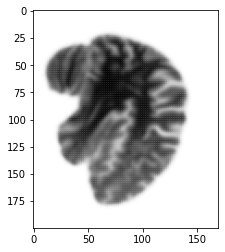

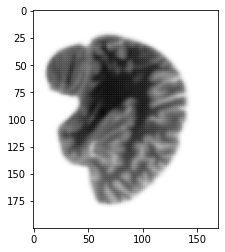

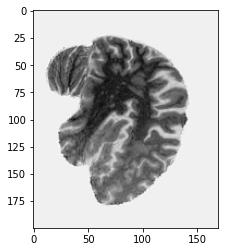

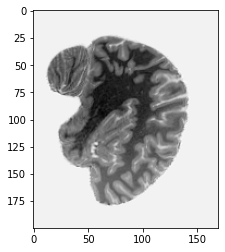

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2752
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2528
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2562
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2489
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2334
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2335
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2269
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2316
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2232
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2312
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2270
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2417
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2214
Epoch 1/1
1/1 [==========

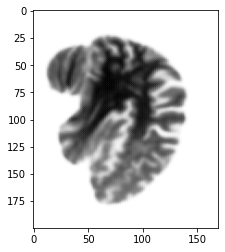

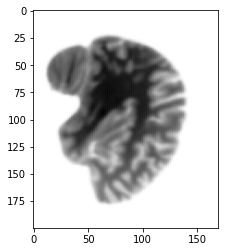

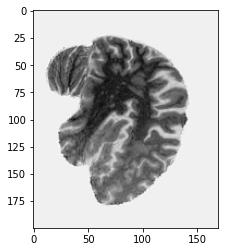

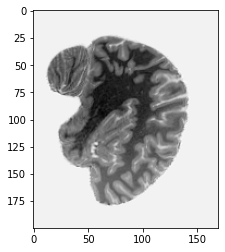

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2202
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2273
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2607
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2074
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2249
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2159
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2020
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2154
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2130
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2126
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2190
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2137
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2128
Epoch 1/1
1/1 [==========

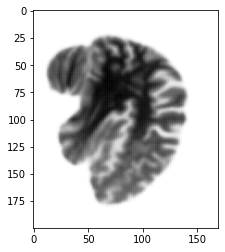

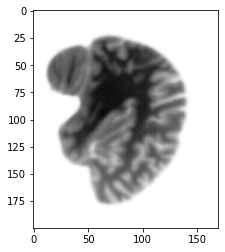

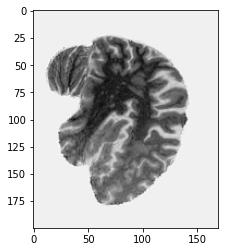

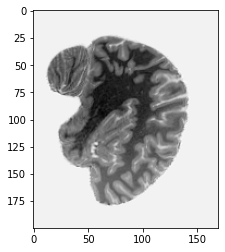

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2058
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1996
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1987
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1905
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1980
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2000
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1925
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1960
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2026
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2019
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2038
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2008
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2031
Epoch 1/1
1/1 [==========

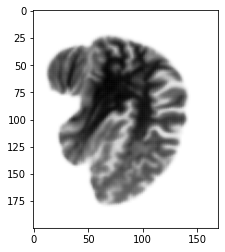

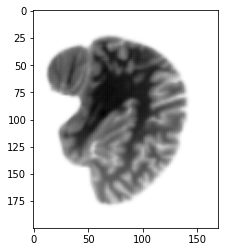

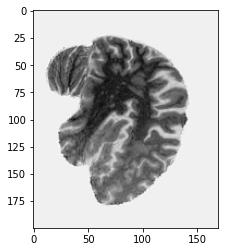

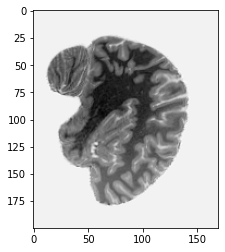

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1890
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1845
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1997
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2031
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1798
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1852
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1989
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1813
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1796
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1966
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1925
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1807
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1807
Epoch 1/1
1/1 [==========

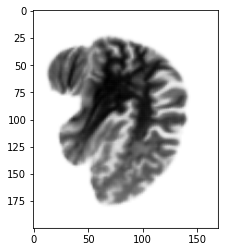

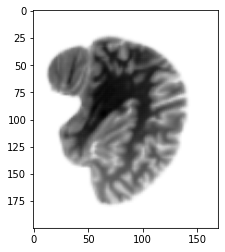

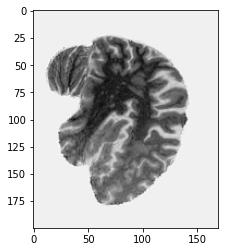

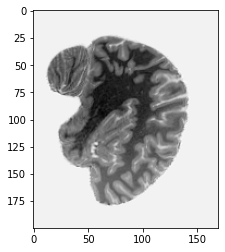

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1939
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1764
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1787
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1778
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1906
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.2012
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1863
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1863
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1911
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1821
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1813
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1797
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1791
Epoch 1/1
1/1 [==========

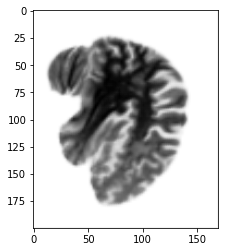

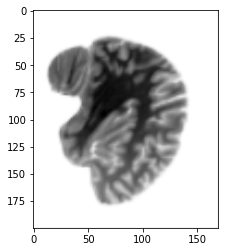

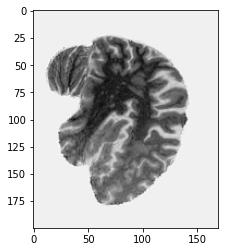

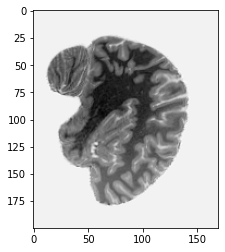

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1701
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1778
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1726
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1697
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1680
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1743
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1851
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1632
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1676
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1750
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1799
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1797
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1829
Epoch 1/1
1/1 [==========

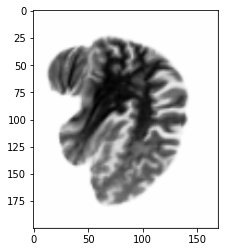

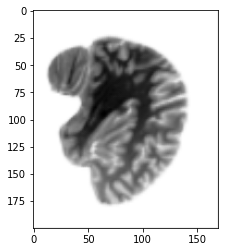

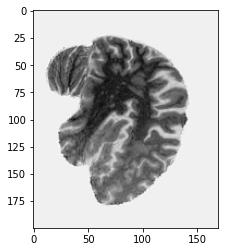

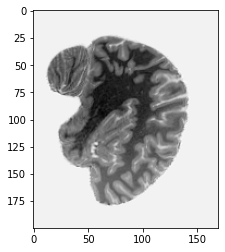

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1782
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1777
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1586
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1698
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1678
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1754
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1572
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1644
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1823
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1684
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1556
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1684
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1574
Epoch 1/1
1/1 [==========

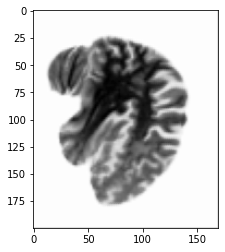

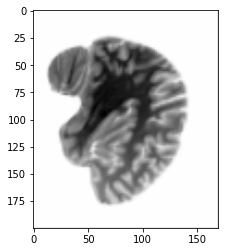

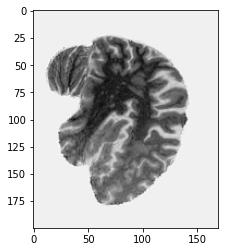

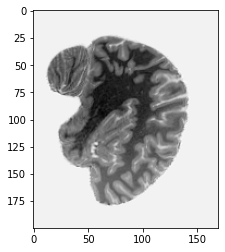

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1614
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1546
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1686
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1553
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1638
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1603
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1650
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1581
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1605
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1602
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1550
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1578
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1517
Epoch 1/1
1/1 [==========

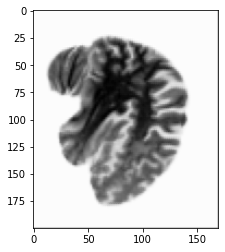

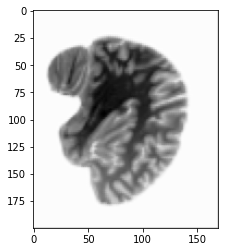

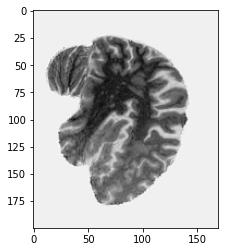

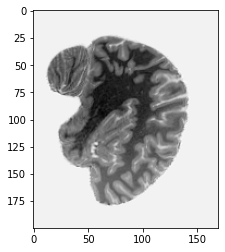

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1482
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1522
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1583
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1577
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1441
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1491
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1481
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1477
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1587
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1544
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1551
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1589
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1736
Epoch 1/1
1/1 [==========

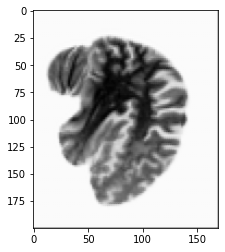

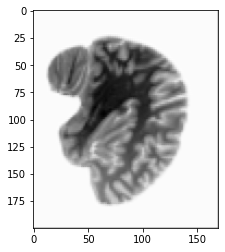

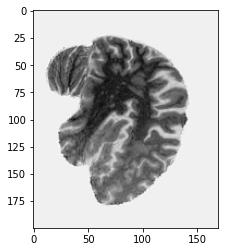

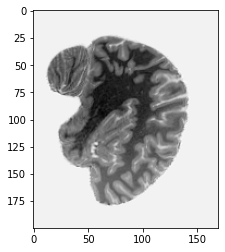

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1360
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1404
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1371
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1419
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1465
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1556
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1439
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1281
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1324
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1319
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1262
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1326
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1293
Epoch 1/1
1/1 [==========

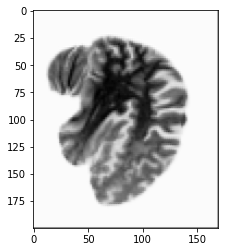

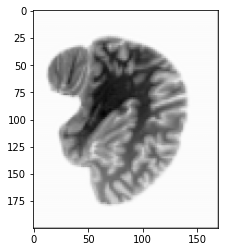

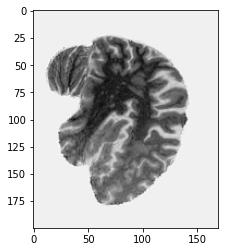

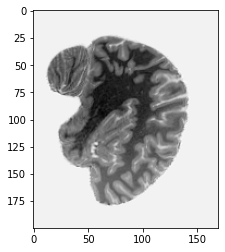

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1256
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1180
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1361
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1222
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1209
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1163
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1190
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1128
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1105
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1189
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1250
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1080
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1102
Epoch 1/1
1/1 [==========

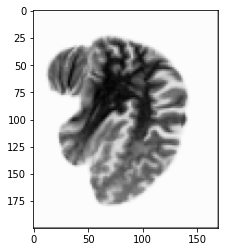

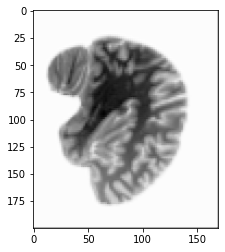

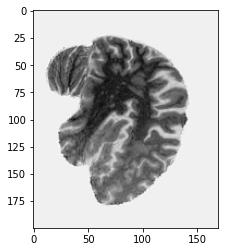

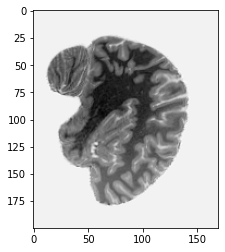

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1123
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1043
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1070
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1166
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1020
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0989
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1023
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1065
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1015
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.1034
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0998
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0957
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0925
Epoch 1/1
1/1 [==========

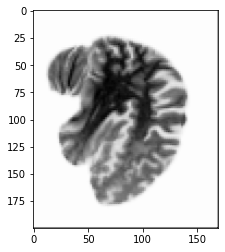

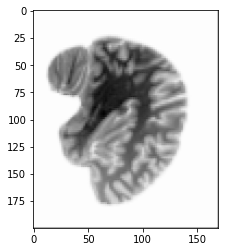

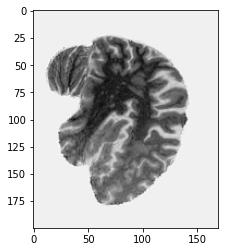

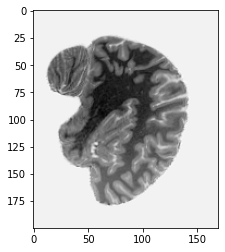

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0902
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0896
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0950
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0910
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0882
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0878
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0850
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0835
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0929
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0833
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0884
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0822
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0827
Epoch 1/1
1/1 [==========

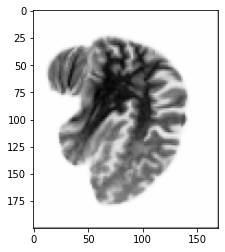

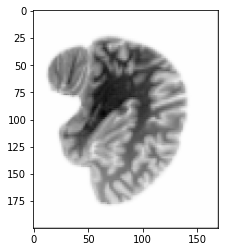

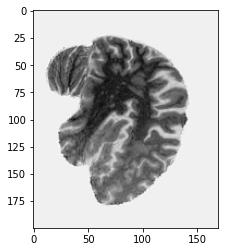

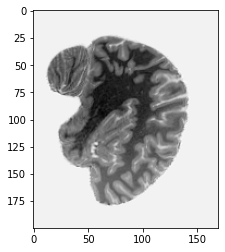

Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0766
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0776
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0750
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0754
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0796
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0738
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0733
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0724
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0708
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0723
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0702
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0709
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 0.0700
Epoch 1/1
1/1 [==========

In [ ]:

for i in range(100):
  for _ in range(20):
    chosen_indices= np.asarray(sample(list(range(len(train_t1s))), 1))
    autoencoder.fit(train_t1s[chosen_indices], train_t1s[chosen_indices])
  plt.imshow(autoencoder.predict(train_t1s[0:1])[0, 40, :, :, 0], cmap='Greys')
  plt.show()
  plt.imshow(autoencoder.predict(test_t1s[0:1])[0, 40, :, :, 0], cmap='Greys')
  plt.show()
  plt.imshow(train_t1s[0, 40, :, :, 0], cmap='Greys')
  plt.show()
  plt.imshow(test_t1s[0, 40, :, :, 0], cmap='Greys')
  plt.show()
  if i % 5 == 0:
    autoencoder.save('models/7_28_autoencoder_t1')